### 1- Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('job_placement.csv')
dataset

,gender,stream,age,gpa,years_of_experience,salary
0,Male,Computer Science,25,3.7,2,60000
1,Female,Electrical Engineering,24,3.6,1,65000
2,Male,Mechanical Engineering,26,3.8,3,58000
3,Female,Information Technology,23,3.5,2,0
4,Male,Computer Science,24,3.9,2,62000
...,...,...,...,...,...,...
695,Male,Computer Science,23,3.8,3,67000
696,Female,Electronics and Communication,26,3.9,3,66000
697,Male,Computer Science,24,3.8,3,65000
698,Female,Electrical Engineering,23,3.7,2,66000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               700 non-null    object 
 1   stream               700 non-null    object 
 2   age                  700 non-null    int64  
 3   gpa                  700 non-null    float64
 4   years_of_experience  700 non-null    int64  
 5   salary               700 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 32.9+ KB


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# imputing zero salaries with most frequent salary

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='most_frequent')
imputer.fit(y.reshape(-1, 1))
y = imputer.transform(y.reshape(-1, 1))
y = y.reshape(-1)
y

array([60000, 65000, 58000, 66000, 62000, 63000, 59000, 66000, 64000,
       57000, 61000, 66000, 63000, 64000, 66000, 66000, 61000, 62000,
       59000, 65000, 67000, 66000, 60000, 63000, 60000, 66000, 64000,
       66000, 59000, 62000, 61000, 66000, 65000, 64000, 67000, 66000,
       63000, 62000, 60000, 61000, 66000, 65000, 66000, 63000, 64000,
       66000, 65000, 66000, 67000, 68000, 66000, 67000, 66000, 65000,
       66000, 66000, 63000, 62000, 60000, 61000, 66000, 65000, 66000,
       63000, 64000, 66000, 65000, 66000, 67000, 68000, 66000, 67000,
       66000, 65000, 66000, 66000, 63000, 62000, 60000, 61000, 66000,
       65000, 66000, 63000, 64000, 66000, 65000, 66000, 67000, 68000,
       66000, 67000, 66000, 65000, 66000, 66000, 63000, 62000, 60000,
       61000, 66000, 65000, 66000, 63000, 64000, 66000, 65000, 66000,
       67000, 68000, 66000, 67000, 66000, 65000, 66000, 66000, 63000,
       62000, 60000, 61000, 66000, 65000, 66000, 63000, 64000, 66000,
       65000, 66000,

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_cols = [0, 1]
ct = ColumnTransformer(transformers=[(
    'my_encoder', OneHotEncoder(), cat_cols)], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 1.0, ..., 25, 3.7, 2],
       [1.0, 0.0, 0.0, ..., 24, 3.6, 1],
       [0.0, 1.0, 0.0, ..., 26, 3.8, 3],
       ...,
       [0.0, 1.0, 1.0, ..., 24, 3.8, 3],
       [1.0, 0.0, 0.0, ..., 23, 3.7, 2],
       [0.0, 1.0, 0.0, ..., 26, 3.6, 1]], dtype=object)

### 2-Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [8]:
print("Training Data..")
print("The shape of training features: ", X_train.shape)
print("The shape of training labels: ", y_train.shape)

Training Data..
The shape of training features:  (560, 10)
The shape of training labels:  (560,)


In [9]:
print("Testing Data..")
print("The shape of testing features: ", X_test.shape)
print("The shape of testing labels: ", y_test.shape)

Testing Data..
The shape of testing features:  (140, 10)
The shape of testing labels:  (140,)


In [10]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
training_acc = np.ceil(linear_regressor.score(X_train, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  18.0 %


In [12]:
testing_acc = np.ceil(linear_regressor.score(X_test, y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

The Testing_acc Accuracy =  15.0 %


In [13]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[ 192.52736172 -192.52736172  140.91140602 -297.92356592   72.19623517
   44.77962705   40.03629769  -85.43838561 5722.51857754  328.42383224]
44598.17394370033


In [14]:
print(f"y = {linear_regressor.intercept_}")
for i in range(len(linear_regressor.coef_)):
    print(f"  + {linear_regressor.coef_[i]} X{i}")

y = 44598.17394370033
  + 192.52736171591351 X0
  + -192.5273617159157 X1
  + 140.91140601840883 X2
  + -297.9235659244165 X3
  + 72.19623516799645 X4
  + 44.77962705215755 X5
  + 40.03629768585839 X6
  + -85.43838560960864 X7
  + 5722.5185775440605 X8
  + 328.42383223651694 X9


### 3-Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)

In [16]:
# choose the gpa column for the polynomial transformation
X_train = X_train[:, -2:-1]

In [17]:
X_poly = poly_features.fit_transform(X_train)

In [18]:
poly_regressor = LinearRegression()

In [19]:
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [20]:
training_acc = np.ceil(poly_regressor.score(X_poly, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  18.0 %


In [21]:
testing_acc = np.ceil(poly_regressor.score(
    poly_features.fit_transform(X_test[:, -2:-1]), y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

The Testing_acc Accuracy =  24.0 %


Text(0, 0.5, 'salary')

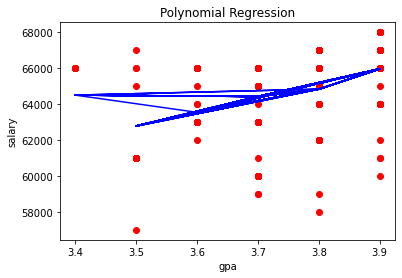

In [22]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, poly_regressor.predict(X_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('gpa')
plt.ylabel('salary')